With the recent shooting at [Robb Elementary School in Uvalde, Texas](https://en.wikipedia.org/wiki/Robb_Elementary_School_shooting) occuring only two weeks ago, the topics of school shootings, mass shootings, and gun violence have been very prominent and pertinent in America. For this reason, I decided to conduct my first python data project on K-12 School Shooting Fatalities, thanks to the help of the [K-12 School Shooting Database](https://www.chds.us/ssdb/about/) from the Naval Postgraduate School and the Center of Homeland Defense and Security. Since the deaths of these destructive acts are the most damaging factor, and whilst still destructive, gang-motivated school shootings are not what most think of when discussing the issue at hand, I decided to primarily focus on non gang-motivated fatalities to better understand the data. Though my analysis leaves many questions unanswered, such as concrete solvable causes of school shootings, I do believe the insight it offers may help to at least dispell the mythos that tends to linger around such a large and complicated topic.

In [364]:
#importing modules to assist in analysis and visualizations
import pandas as pd
import regex as re
import openpyxl
import matplotlib.pyplot as plt
import statistics

#importing and reading the Excel file
File = pd.ExcelFile('SchoolData.xlsx')
incident = pd.read_excel(File, 'INCIDENT')
shooter = pd.read_excel(File, 'SHOOTER')
victim = pd.read_excel(File, 'VICTIM')
weapon = pd.read_excel(File, 'WEAPON')

In [365]:
#creating the victim data frame focused specifically on fatalities that includes
#victim gender and race, as well as includes incident id to help merge it with
#the incident data

victim_df = pd.DataFrame(victim,columns=['incidentid','injury','gender', 'race'])
victim_df = victim_df[(victim_df.injury.isin(['Fatal']))]
incident_df = pd.DataFrame(incident)

In [367]:
#Sorting incidents by date
incident_df.sort_values(by=['Date'], inplace=True)

#Focusing data specifically on non gang-related shootings
incident_df = incident_df.loc[incident_df['Gang_Related'] != "Yes"]

#Merging the incident data frame with the victim data frame to calculate fatalities
non_gang_full = incident_df.merge(victim_df, left_on='Incident_ID', right_on='incidentid')

#parsing the date to be able to better analyze year and month data
dates = non_gang_full['Date'].str.split('-', expand=True)
non_gang_full['year']= dates[0]
non_gang_full['month']= dates[1]
non_gang_full['date']= dates[2]

In [368]:
#setting up a tuples to conduct the year death count on
year_fatals = (non_gang_full['year'] , non_gang_full['injury'])

#setting up the count loop and printing the death count by year with spaces to prevent
#results cluttering
counts = dict()
for deaths in year_fatals[0]:
    counts [deaths] = counts.get(deaths,0) + 1

print("School Shooting Fatalities by Year:")
print(" ")
print(counts)
print(" ")

#Sorting the yearly death count in reverse order from highest to lowest,
#then printing the results 
sorted_dict = {}
sorted_keys = sorted(counts, key=counts.get, reverse=True)

for w in sorted_keys:
    sorted_dict[w] = counts[w]

print("Years Ranked by Highest Number of School Shooting Fatalities:")
print(" ")
print(sorted_dict)
print(" ")

#Offering insight
print("School shooting fatalities rose and have stayed above 20 fatalities a year since 2018.")

School Shooting Fatalities by Year:
 
{'1970': 7, '1971': 7, '1972': 3, '1973': 3, '1974': 10, '1975': 5, '1976': 3, '1977': 4, '1978': 8, '1979': 4, '1980': 7, '1981': 4, '1982': 5, '1983': 8, '1984': 6, '1985': 5, '1986': 7, '1987': 5, '1988': 12, '1989': 9, '1990': 4, '1991': 9, '1992': 14, '1993': 25, '1994': 15, '1995': 7, '1996': 17, '1997': 15, '1998': 13, '1999': 17, '2000': 10, '2001': 6, '2002': 4, '2003': 5, '2004': 4, '2005': 15, '2006': 15, '2007': 1, '2008': 8, '2009': 3, '2010': 4, '2011': 2, '2012': 34, '2013': 8, '2014': 11, '2015': 5, '2016': 4, '2017': 9, '2018': 47, '2019': 22, '2020': 25, '2021': 41, '2022': 46}
 
Years Ranked by Highest Number of School Shooting Fatalities:
 
{'2018': 47, '2022': 46, '2021': 41, '2012': 34, '1993': 25, '2020': 25, '2019': 22, '1996': 17, '1999': 17, '1994': 15, '1997': 15, '2005': 15, '2006': 15, '1992': 14, '1998': 13, '1988': 12, '2014': 11, '1974': 10, '2000': 10, '1989': 9, '1991': 9, '2017': 9, '1978': 8, '1983': 8, '2008': 8

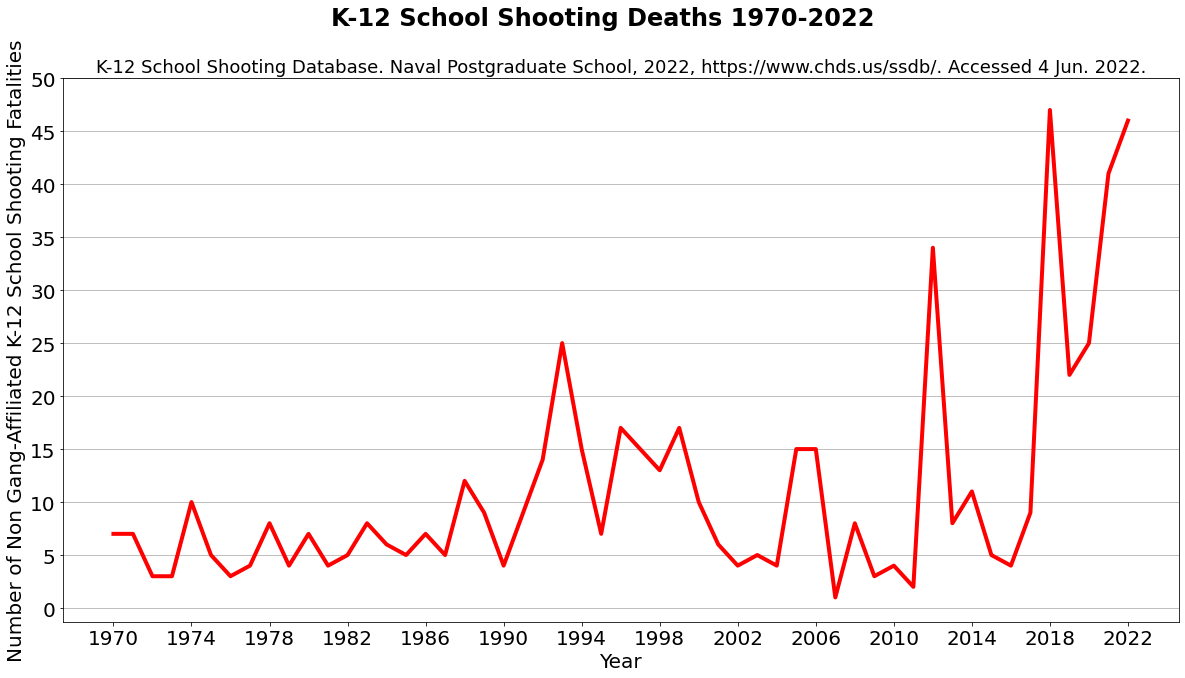

In [369]:
#Converting the death count by year dictionary into
#x and y points to graph
myList = sorted_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

#Plotting the graph
plt.figure(figsize=(20, 10))
#Changing the line color and size
plt.plot(x, y, color="red", linewidth=4)
#Condensing the years into sets of four to more easily read the graph
x_ticks = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52]
x_labels = ['1970', '1974', '1978', '1982', '1986', '1990', '1994', '1998', '2002', '2006', '2010', '2014', '2018', '2022']
#Keeping the graph size relative to y axis
y_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
y_labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50']
#Plotting the x and y ticks/labels above
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.yticks(ticks=y_ticks, labels=y_labels)
#Adding y grid marks to more easily read the graph
plt.grid(axis='y')
#Increasing the font size
plt.rc('font', size=20)
#Increasing the label size
plt.tick_params(axis='both', which='major', labelsize=20)
#Creating the subtitle
plt.title('K-12 School Shooting Database. Naval Postgraduate School, 2022, https://www.chds.us/ssdb/. Accessed 4 Jun. 2022.',fontsize=18)
#Creating the title
plt.suptitle("K-12 School Shooting Deaths 1970-2022",fontweight='bold')
#Adding x axis label
plt.xlabel("Year")
#Adding y axis label
plt.ylabel("Number of Non Gang-Affiliated K-12 School Shooting Fatalities")
#Saving the visualization as a png
plt.savefig('School.png')

In [370]:
#setting up tuples to conduct the month death count on
month_fatals = (non_gang_full['month'] , non_gang_full['injury'])

#setting up the count loop and printing the death count by year with spaces to prevent
#results cluttering
counts_2 = dict()
for deaths_2 in month_fatals[0]:
    counts_2 [deaths_2] = counts_2.get(deaths_2,0) + 1
    
print("School Shooting Fatalities by Month:")
print(" ")
print(counts_2)
print(" ")

#Sorting the yearly death count in reverse order from highest to lowest,
#then printing the results
sorted_dict_2 = {}
sorted_keys_2 = sorted(counts_2, key=counts_2.get, reverse=True)

for w_2 in sorted_keys_2:
    sorted_dict_2[w_2] = counts_2[w_2]

print("Months Ranked by Highest Number of School Shooting Fatalities:")
print(" ")
print(sorted_dict_2)
print(" ")

#Offering insight
print("February and May have been the months with the highest fatalities, while August, June, and July have,") 
print("as the months of summer vacation, unsurprisingly been the lowest.")

School Shooting Fatalities by Month:
 
{'01': 52, '04': 57, '08': 23, '09': 44, '10': 47, '12': 60, '02': 83, '11': 55, '05': 83, '03': 46, '06': 20, '07': 17}
 
Months Ranked by Highest Number of School Shooting Fatalities:
 
{'02': 83, '05': 83, '12': 60, '04': 57, '11': 55, '01': 52, '10': 47, '03': 46, '09': 44, '08': 23, '06': 20, '07': 17}
 
February and May have been the months with the highest fatalities, while August, June, and July have,
as the months of summer vacation, unsurprisingly been the lowest.


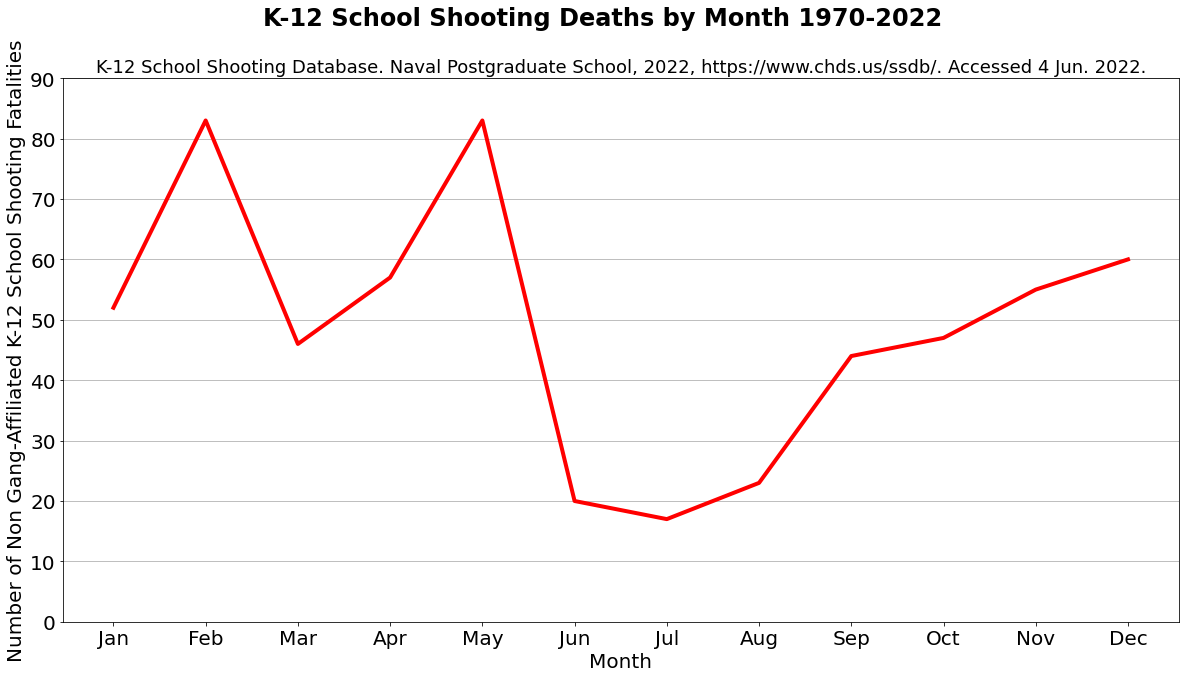

In [371]:
#Converting the death count by year dictionary into
#x and y points to graph
myList_2 = sorted_dict_2.items()
myList_2 = sorted(myList_2) 
x, y = zip(*myList_2) 

#Plotting the graph
plt.figure(figsize=(20, 10))
#Changing the line size and color
plt.plot(x, y, color="red", linewidth=4)
#Chagning the months from numbers to abbreviated names to make them easier to read
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Keeping the graph size relative to y axis
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
y_labels = ['0', '10', '20', '30', '40','50', '60', '70', '80', '90']
#Plotting the x and y ticks/labels above
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.yticks(ticks=y_ticks, labels=y_labels)
#Adding y grid marks to more easily read the graph
plt.grid(axis='y')
#Increasing the font size
plt.rc('font', size=20)
#Increasing the label size
plt.tick_params(axis='both', which='major', labelsize=20)
#Creating the subtitle
plt.title('K-12 School Shooting Database. Naval Postgraduate School, 2022, https://www.chds.us/ssdb/. Accessed 4 Jun. 2022.',fontsize=18)
#Creating the title
plt.suptitle("K-12 School Shooting Deaths by Month 1970-2022",fontweight='bold')
#Labeling the x axis
plt.xlabel("Month")
#Labeling the y axis
plt.ylabel("Number of Non Gang-Affiliated K-12 School Shooting Fatalities")
#Saving the visualization as a png
plt.savefig('School_Month.png')

In [373]:
#setting up tuples to conduct the state death count on
state_fatals = (non_gang_full['year'] , non_gang_full['State'])

#Creating the state death count loop
state_counts = dict()
for state_deaths in state_fatals[1]:
    state_counts [state_deaths] = state_counts.get(state_deaths,0) + 1

#Sorting the yearly death count in reverse order from highest to lowest,
#then printing the results with spaces to prevent results cluttering
state_dict = {}
state_keys = sorted(state_counts, key=state_counts.get, reverse=True)

for state_w in state_keys:
    state_dict[state_w] = state_counts[state_w]
print("States Ranked by Highest Number of School Shooting Fatalities:")
print(" ")
print(state_dict)

#Offering insight
print(" ")
print("Texas, California, and Florida have had the highest number of fatalities from school shootings since 1970.")

States Ranked by Highest Number of School Shooting Fatalities:
 
{'TX': 68, 'CA': 51, 'FL': 41, 'CT': 30, 'PA': 25, 'IL': 25, 'TN': 23, 'CO': 23, 'OH': 20, 'NY': 20, 'MO': 17, 'MI': 17, 'MD': 16, 'WA': 15, 'LA': 14, 'DC': 13, 'GA': 13, 'AR': 12, 'MN': 12, 'SC': 11, 'VA': 9, 'IN': 9, 'OR': 9, 'KY': 9, 'NJ': 8, 'MS': 8, 'AL': 8, 'NC': 7, 'NM': 6, 'WI': 5, 'NV': 5, 'AZ': 5, 'DE': 4, 'KS': 4, 'OK': 3, 'IA': 3, 'MA': 3, 'WV': 2, 'MT': 2, 'AK': 2, 'UT': 2, 'NE': 2, 'RI': 2, 'ID': 1, 'VT': 1, 'ME': 1, 'ND': 1}
 
Texas, California, and Florida have had the highest number of fatalities from school shootings since 1970.


The following are lists from the [Pew Research Center's 2014 Religious Landscape Study](https://www.pewresearch.org/religion/interactives/how-religious-is-your-state/) of US States with the highest and lowest percent of adults that are "highly religious". To dispell the myth that school shootings are tied to a lack of religion, I compared Texas, the state with the highest amount of school shooting fatalities and 11th in residents that are "highly religious", to Vermont and Alaska, whom are in the bottom of both school shootings and being "highly religious".

In [374]:
#Using the dictionary keys from the above dictionary to pull state death numbers
print('Number of school shooting fatalities in Texas since 1970:')
print(state_dict['TX'])
print('Number of school shooting fatalities in Vermont since 1970:')
print(state_dict['VT'])
print('Number of school shooting fatalities in Alaska since 1970:')
print(state_dict['AK'])

Number of school shooting fatalities in Texas since 1970:
68
Number of school shooting fatalities in Vermont since 1970:
1
Number of school shooting fatalities in Alaska since 1970:
2


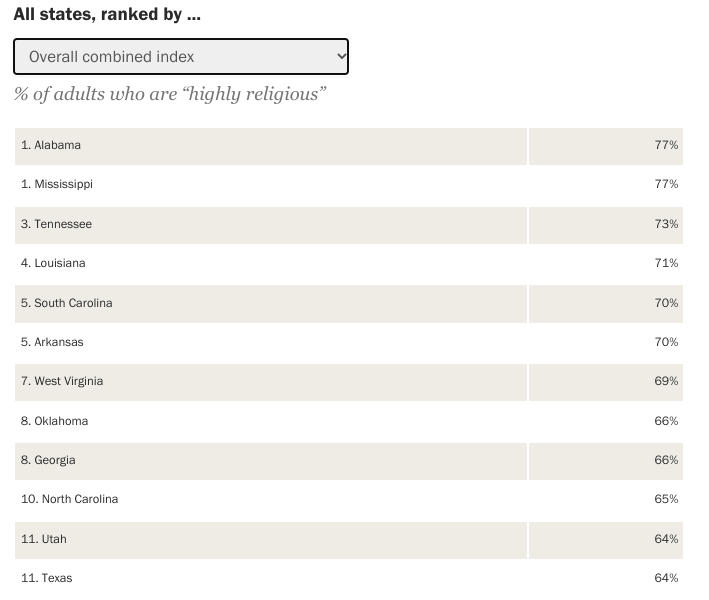

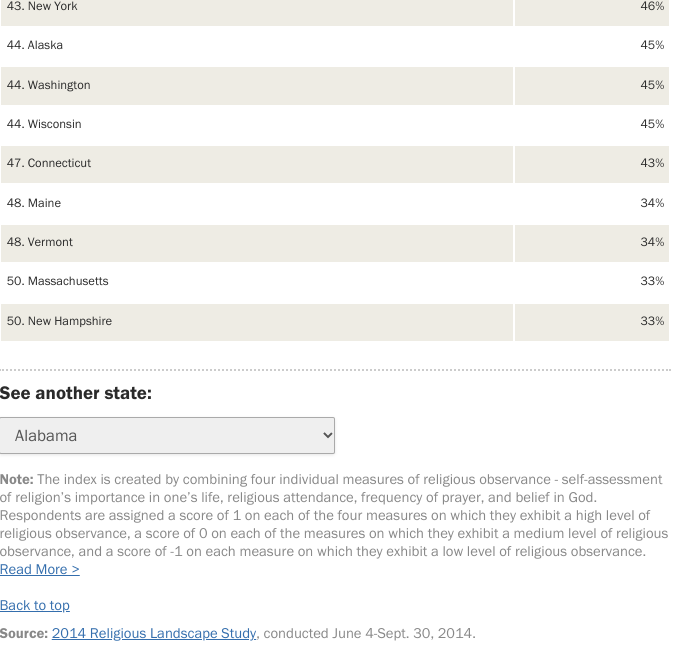

The following are the rankings of Texas and Alaska on both strict gun laws and overall mental health. Note that Alaska is seen as having looser gun laws and worse overall mental health, yet still has had less school shooting fatalities.

[(Texas Gun Laws)](https://everytownresearch.org/rankings/state/texas/)
[(Alaska Gun Laws)](https://everytownresearch.org/rankings/state/alaska/)
[(2022 Mental Health Rankings)](https://mhanational.org/issues/2022/ranking-states#overall-ranking)

Texas' Gun Law Rankings

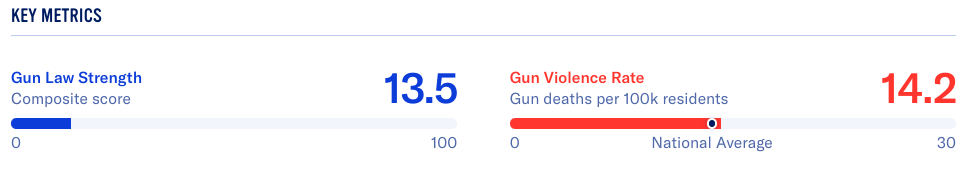

Alaska's Gun Law Rankings

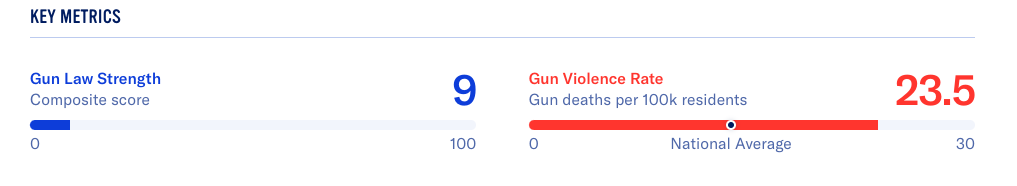

States with Lowest Mental Health Ratings

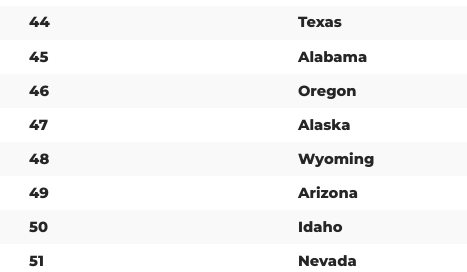

In [377]:
#creating the Texas data frame focused specifically on Texas since it
#currently has the highest number of school shooting fatalities in the
#country
texas_df = non_gang_full.loc[non_gang_full['State'] == "TX"] 
#Since year is listed the same number of times as each death in the merged
#data set, using year to conduct the count loop
state_fatals_years = (texas_df['year'])

#creating the count loop, then printing the results with spaces
#to prevent clutter
state_counts_1 = dict()
for state_deaths_1 in state_fatals_years:
    state_counts_1 [state_deaths_1] = state_counts_1.get(state_deaths_1,0) + 1

print("School Shooting Fatalities in Texas by Year:")
print(" ")
print(state_counts_1)
print(" ")

#Reverse ordering the above results to rank the 
#years by death toll
state_dict_2 = {}
state_keys_2 = sorted(state_counts_1, key=state_counts_1.get, reverse=True)

for state_w_2 in state_keys_2:
    state_dict_2[state_w_2] = state_counts_1[state_w_2]
    
print("Years in Texas Ranked by Highest Number of School Shooting Fatalities:")
print(" ")
print(state_dict_2)
print(" ")

#Calculating the five_year_total and putting the 
#Texas total from earlier into a variable
five_year_total = (23+3+5+1+11)
texas_total = 68

#Calculating the five year total as a percentage of the 
#Texas total
five_year_percent = round((float(five_year_total/float(texas_total)) * 100))

#Using the above dictionary keys to pull death data by year
print('Number of School Shooting Deaths in Texas in the last 5 years:')
print(" ")
print('2022 - ' + str(state_dict_2['2022']) + ' deaths')
print('2021 - ' + str(state_dict_2['2021']) + ' deaths')
print('2020 - ' + str(state_dict_2['2020']) + ' deaths')
print('2019 - ' + str(state_dict_2['2019']) + ' deaths')
print('2018 - ' + str(state_dict_2['2018']) + ' deaths')
print(" ")

#Offering insight
print('Of the ' + str(texas_total) + " deaths from school shootings in Texas since 1970, " + str(five_year_total) + ' deaths, or ' + str(five_year_percent) + "%, were in the past five years.")

School Shooting Fatalities in Texas by Year:
 
{'1971': 1, '1976': 1, '1977': 1, '1978': 2, '1979': 1, '1980': 1, '1983': 3, '1986': 1, '1987': 1, '1988': 1, '1991': 2, '1992': 2, '1993': 2, '1995': 1, '2001': 1, '2003': 1, '2005': 1, '2015': 2, '2018': 11, '2019': 1, '2020': 5, '2021': 3, '2022': 23}
 
Years in Texas Ranked by Highest Number of School Shooting Fatalities:
 
{'2022': 23, '2018': 11, '2020': 5, '1983': 3, '2021': 3, '1978': 2, '1991': 2, '1992': 2, '1993': 2, '2015': 2, '1971': 1, '1976': 1, '1977': 1, '1979': 1, '1980': 1, '1986': 1, '1987': 1, '1988': 1, '1995': 1, '2001': 1, '2003': 1, '2005': 1, '2019': 1}
 
Number of School Shooting Deaths in Texas in the last 5 years:
 
2022 - 23 deaths
2021 - 3 deaths
2020 - 5 deaths
2019 - 1 deaths
2018 - 11 deaths
 
Of the 68 deaths from school shootings in Texas since 1970, 43 deaths, or 63%, were in the past five years.


In [378]:
#Creating the bullied and not bullied data frames to
#compare the difference in fatalities caused by either
bullied = non_gang_full.loc[non_gang_full['Bullied'] == 'Yes']
not_bullied = non_gang_full.loc[non_gang_full['Bullied'] == 'No']

#Creating the count loop for bullied, then printing it
counts_3 = dict()
for yes in bullied['Bullied']:
    counts_3 [yes] = counts_3.get(yes,0) + 1

print(counts_3)

#Creating the count loop for not bullied, then printing it
counts_4 = dict()
for no in not_bullied['Bullied']:
    counts_4 [no] = counts_4.get(no,0) + 1

print(counts_4)

#Calculating the sum of the two amounts
total_sum = int(counts_3['Yes']) + int(counts_4['No'])

#Calculating not bullied as a percent of the sum
not_bullied_percent = round((float(counts_4['No'])/float(total_sum)) * 100)

#Offering insight
print(" ")
print(str(not_bullied_percent) + '% of school shooting fatalities were listed as unrelated to bullying.')

{'Yes': 78}
{'No': 401}
 
84% of school shooting fatalities were listed as unrelated to bullying.


In [379]:
#Creating a new incident data frame to analyze gang-related shootings
incident_df_2 = pd.DataFrame(incident)

#Creating the gang related and not gang related data frames
gang_full = incident_df_2.loc[incident_df_2['Gang_Related'] == 'Yes']
not_gang_full = incident_df_2.loc[incident_df_2['Gang_Related'] == 'No']

#Creating the count loop for gang related and
#printing the results
counts_5 = dict()
for yes_1 in gang_full['Gang_Related']:
    counts_5 [yes_1] = counts_5.get(yes_1,0) + 1

print(counts_5)

#Creating the count loop for not gang related
#and printing the results
counts_6 = dict()
for no_1 in not_gang_full['Gang_Related']:
    counts_6 [no_1] = counts_6.get(no_1,0) + 1

print(counts_6)

#Calculating the sum of the two counts
total_sum_2 = int(counts_5['Yes']) + int(counts_6['No'])

#Calculating not gang related fatalities as a percent of the sum
not_gang_percent = round((float(counts_6['No'])/float(total_sum_2)) * 100)

#Offering insight
print(" ")
print(str(not_gang_percent) + '% of school shootings were listed as not gang-related.')

{'Yes': 237}
{'No': 1408}
 
86% of school shootings were listed as not gang-related.


In [380]:
#Creating the female and male victim fatalities data frames
female_victim_df = non_gang_full[(non_gang_full.gender.isin(['Female']))]
male_victim_df = non_gang_full[(non_gang_full.gender.isin(['Male']))]

#Creating the count loop for female victims and
#printing the results
female_counts = dict()
for yes_2 in female_victim_df['gender']:
    female_counts [yes_2] = female_counts.get(yes_2,0) + 1

print(female_counts)

#Creating the count loop for male victims and
#printing the results
male_counts = dict()
for yes_3 in male_victim_df['gender']:
    male_counts [yes_3] = male_counts.get(yes_3,0) + 1

print(male_counts)

#Calculating the sum of the two counts
total_sum_2 = int(female_counts[yes_2]) + int(male_counts[yes_3])

#Calculating male victim fatalities as a percent of the sum
male_percent = round((float(male_counts[yes_3])/float(total_sum_2)) * 100)

#Offering insight
print(" ")
print(str(male_percent) + '% of school shooting fatalities with recorded gender were of male victims.')

{'Female': 151}
{'Male': 415}
 
73% of school shooting fatalities with recorded gender were of male victims.


In [381]:
#Creating the black, white, hispanic, and asian victim fatalities data frames
black_victim_df = non_gang_full[(non_gang_full.race.isin(['Black']))]
white_victim_df = non_gang_full[(non_gang_full.race.isin(['White']))]
hispanic_victim_df = non_gang_full[(non_gang_full.race.isin(['Hispanic']))]
asian_victim_df = non_gang_full[(non_gang_full.race.isin(['Asian']))]

#Creating the count loop for black victims and
#printing the results
black_victim_counts = dict()
for yes_3 in black_victim_df['race']:
    black_victim_counts [yes_3] = black_victim_counts.get(yes_3,0) + 1

print(black_victim_counts)

#Creating the count loop for white victims and
#printing the results
white_victim_counts = dict()
for yes_4 in white_victim_df['race']:
    white_victim_counts [yes_4] = white_victim_counts.get(yes_4,0) + 1

print(white_victim_counts)

#Creating the count loop for hispanic victims and
#printing the results
hispanic_victim_counts = dict()
for yes_5 in hispanic_victim_df['race']:
    hispanic_victim_counts [yes_5] = hispanic_victim_counts.get(yes_5,0) + 1

print(hispanic_victim_counts)

#Creating the count loop for asian victims and
#printing the results
asian_victim_counts = dict()
for yes_6 in asian_victim_df['race']:
    asian_victim_counts [yes_6] = asian_victim_counts.get(yes_6,0) + 1

print(asian_victim_counts)

#Calculating the sum of all above counts
total_sum_3 = int(black_victim_counts [yes_3]) + int(white_victim_counts [yes_4]) + int(hispanic_victim_counts [yes_5]) + int(asian_victim_counts [yes_6])

#Calculating black victim fatalities as a percent of the above sum
black_victim_percent = round((float(black_victim_counts [yes_3])/float(total_sum_3)) * 100)

#Offering insight
print(" ")
print(str(black_victim_percent) + '% of school shooting fatalities where victim race was recorded were of black victims.')

{'Black': 65}
{'White': 62}
{'Hispanic': 18}
{'Asian': 7}
 
43% of school shooting fatalities where victim race was recorded were of black victims.


With Americans that identify as black at [13.4% of total population](https://www.census.gov/quickfacts/fact/table/US/PST045221) vs 76.3% of Americans that identify as white, for the amount of black victims to be slighlty higher than white victims leaves further questions to be investigated.

In [401]:
#Creating the weapon data frame
weapon_df = pd.DataFrame(weapon)

#Merging the non gang related school shooting fatalities with the weapon data frame
non_gang_full_weapon = non_gang_full.merge(weapon_df, left_on='Incident_ID', right_on='incidentid')

#Creating a count of guns used in school shootings
gun_counts = dict()
for gun in non_gang_full_weapon['weapontype']:
    gun_counts [gun] = gun_counts.get(gun,0) + 1

#ranking the guns in reverse order by most fatalities attributed,
#then printing it with spaces to avoid cluttering
gun_dict = {}
gun_keys = sorted(gun_counts, key=gun_counts.get, reverse=True)

for gun_w in gun_keys:
    gun_dict[gun_w] = gun_counts[gun_w]

print("Highest Fatalities by Gun Type:")
print(" ")
print(gun_dict)
print(" ")

#Converting the above dictionary into string to index and pull from
gun_string = str(gun_dict)
print('Highest Fatalities by Known Gun Type:')
print(" ")
print(gun_string[1:15])
print(gun_string[17:30])
print(gun_string[32:43])
print(gun_string [60:81])
print(gun_string[130:153]) 
print(gun_string[155:177])
print(" ")

#Calculating all handgun amounts combined as a percent
#of all known gun fatalities
handgun_percent = str(round(((423+4+3)/(423+97+93+21+4+3))*100))

#Offering insight
print('Handguns were used ' + handgun_percent + '% of the time in school shooting fatalities with known guns.')

Highest Fatalities by Gun Type:
 
{'Handgun': 423, 'Shotgun': 97, 'Rifle': 93, 'No Data': 59, 'Multiple Rifles': 21, 'Multiple Unknown': 20, nan: 16, 'Unknown': 7, 'Mulitiple Handguns': 4, 'Multiple Handguns': 3, 'Other': 2}
 
Highest Fatalities by Known Gun Type:
 
'Handgun': 423
'Shotgun': 97
'Rifle': 93
'Multiple Rifles': 21
'Mulitiple Handguns': 4
'Multiple Handguns': 3
 
Handguns were used 67% of the time in school shooting fatalities with known guns.


In [408]:
#Creating data frames for single handgun, rifle, and shotgun fatalities
handgun_df = non_gang_full_weapon[(non_gang_full_weapon.weapontype.isin(['Handgun']))]
rifle_df = non_gang_full_weapon[(non_gang_full_weapon.weapontype.isin(['Rifle']))]
shotgun_df = non_gang_full_weapon[(non_gang_full_weapon.weapontype.isin(['Shotgun']))]

#Creating the handgun victim count loop by incidentid to 
#show how many victims were killed per incident
handgun_victim_counts = dict()
for handgun in handgun_df['incidentid_y']:
    handgun_victim_counts [handgun] = handgun_victim_counts.get(handgun,0) + 1

#Ranking handgun fatalities by shooting
handgun_dict = {}
handgun_keys = sorted(handgun_victim_counts, key=handgun_victim_counts.get, reverse=True)

for handgun_w in handgun_keys:
    handgun_dict[handgun_w] = handgun_victim_counts[handgun_w]

#Looping the above results
res = 0
for val in handgun_dict.values():
    res += val

#Calculating the average number of handgun fatalities per shooting
res = round((res / len(handgun_dict)), 2)

#Offering insight
print("Comparing Average School Shooting Fatalities by Handgun, Rifle, and Shotgun:")
print(" ")
print("Average number of people killed in a school shooting with a handgun as weapon : " + str(res))

#Creating the rifle victim count loop by incidentid to 
#show how many victims were killed per incident
rifle_victim_counts = dict()
for rifle in rifle_df['incidentid_y']:
    rifle_victim_counts [rifle] = rifle_victim_counts.get(rifle,0) + 1

#Ranking rifle fatalities by shooting
rifle_dict = {}
rifle_keys = sorted(rifle_victim_counts, key=rifle_victim_counts.get, reverse=True)

for rifle_w in rifle_keys:
    rifle_dict[rifle_w] = rifle_victim_counts[rifle_w]

#Calculating the average number of handgun fatalities per shooting
res_2 = 0
for val_2 in rifle_dict.values():
    res_2 += val_2
    
res_2 = round((res_2 / len(rifle_dict)), 2)

#Offering insight
print("Average number of people killed in a school shooting with a rifle as weapon : " + str(res_2))

#Creating the shotgun victim count loop by incidentid to 
#show how many victims were killed per incident
shotgun_victim_counts = dict()
for shotgun in shotgun_df['incidentid_y']:
    shotgun_victim_counts [shotgun] = shotgun_victim_counts.get(shotgun,0) + 1

#Ranking shotgun fatalities by shooting
shotgun_dict = {}
shotgun_keys = sorted(shotgun_victim_counts, key=shotgun_victim_counts.get, reverse=True)

for shotgun_w in shotgun_keys:
    shotgun_dict[shotgun_w] = shotgun_victim_counts[shotgun_w]

#Calculating the average number of shotgun fatalities per shooting
res_3 = 0
for val_3 in shotgun_dict.values():
    res_3 += val_3

res_3 = round((res_3 / len(shotgun_dict)), 2)

#Offering insight
print("Average number of people killed in a school shooting with a shotgun as weapon : " + str(res_3))

#Calculating the amount of time more people died by shotgun than rifle and handgun
greater_than = str(round((res_3/res_2), 2))
greater_than_2 = str(round((res_3/res), 2))

#Offering insight
print(" ")
print(greater_than + " times more people are killed in school shootings with a shotgun vs a rifle in school shootings with known guns, and " + greater_than_2 + " times more people killed with a shotgun vs a handgun.")

Comparing Average School Shooting Fatalities by Handgun, Rifle, and Shotgun:
 
Average number of people killed in a school shooting with a handgun as weapon : 1.41
Average number of people killed in a school shooting with a rifle as weapon : 3.72
Average number of people killed in a school shooting with a shotgun as weapon : 5.39
 
1.45 times more people are killed in school shootings with a shotgun vs a rifle in school shootings with known guns, and 3.82 times more people killed with a shotgun vs a handgun.


In [410]:
#Setting up tuples to conduct the deaths per school shooting count on
id_fatals = (non_gang_full['Incident_ID'] , non_gang_full['injury'])

#Creating the deaths per school shooting loop
id_counts = dict()
for id_deaths in id_fatals[0]:
    id_counts [id_deaths] = id_counts.get(id_deaths,0) + 1

#Creating a variable for shootings in 1970
Seventy = [value for key, value in id_counts.items() if '1970' in key.lower()]

#Calculating the mean, median, mode, and maximum amount of school shooting fatalities in 1970
mean_Seventy = float(statistics.mean(Seventy))
median_Seventy = float(statistics.median(Seventy))
mode_Seventy = statistics.median(Seventy)
max_Seventy = max(Seventy)

#Creating a variable for shootings in 2022
Twenty_Two = [value for key, value in id_counts.items() if '2022' in key.lower()]

#Calculating the mean, median, mode, and maximum amount of school shooting fatalities in 2022
mean_Twenty_Two = statistics.mean(Twenty_Two)
median_Twenty_Two = statistics.median(Twenty_Two)
mode_Twenty_Two = statistics.mode(Twenty_Two)
max_Twenty_Two = max(Twenty_Two)

#Offering insight
print('Comparing School Shooting Fatalities from 1970 to School Shooting Fatalities from 2022:')
print(" ")
print('The average number of school shooting fatalities in 1970 was ' + str(round(mean_Seventy)) + ", compared to " + str(round(mean_Twenty_Two)) + " in 2022.")
print(" ")
print("For both 2022 and 1970, the median number of fatalities was " + str(round(median_Twenty_Two)) + ", and the mode was " + str(mode_Seventy) + ".")
print(" ")
print("In 1970 however, the highest number of fatalities in a single school shooting was " + str(max_Seventy) + ", compared to the peak death toll in 2022 of " + str(max_Twenty_Two) + ".")

Comparing School Shooting Fatalities from 1970 to School Shooting Fatalities from 2022:
 
The average number of school shooting fatalities in 1970 was 1, compared to 2 in 2022.
 
For both 2022 and 1970, the median number of fatalities was 1, and the mode was 1.
 
In 1970 however, the highest number of fatalities in a single school shooting was 1, compared to the peak death toll in 2022 of 20.


Comparing this to the death totals chart, it seems that though most school shootings in both 1970 and 2022 only had a single fatality, more fatalities overall have occured from school shootings in 2022, as has the maximum number of people killed during one. 